<a href="https://colab.research.google.com/github/schen304joseph/598HW2/blob/main/598HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

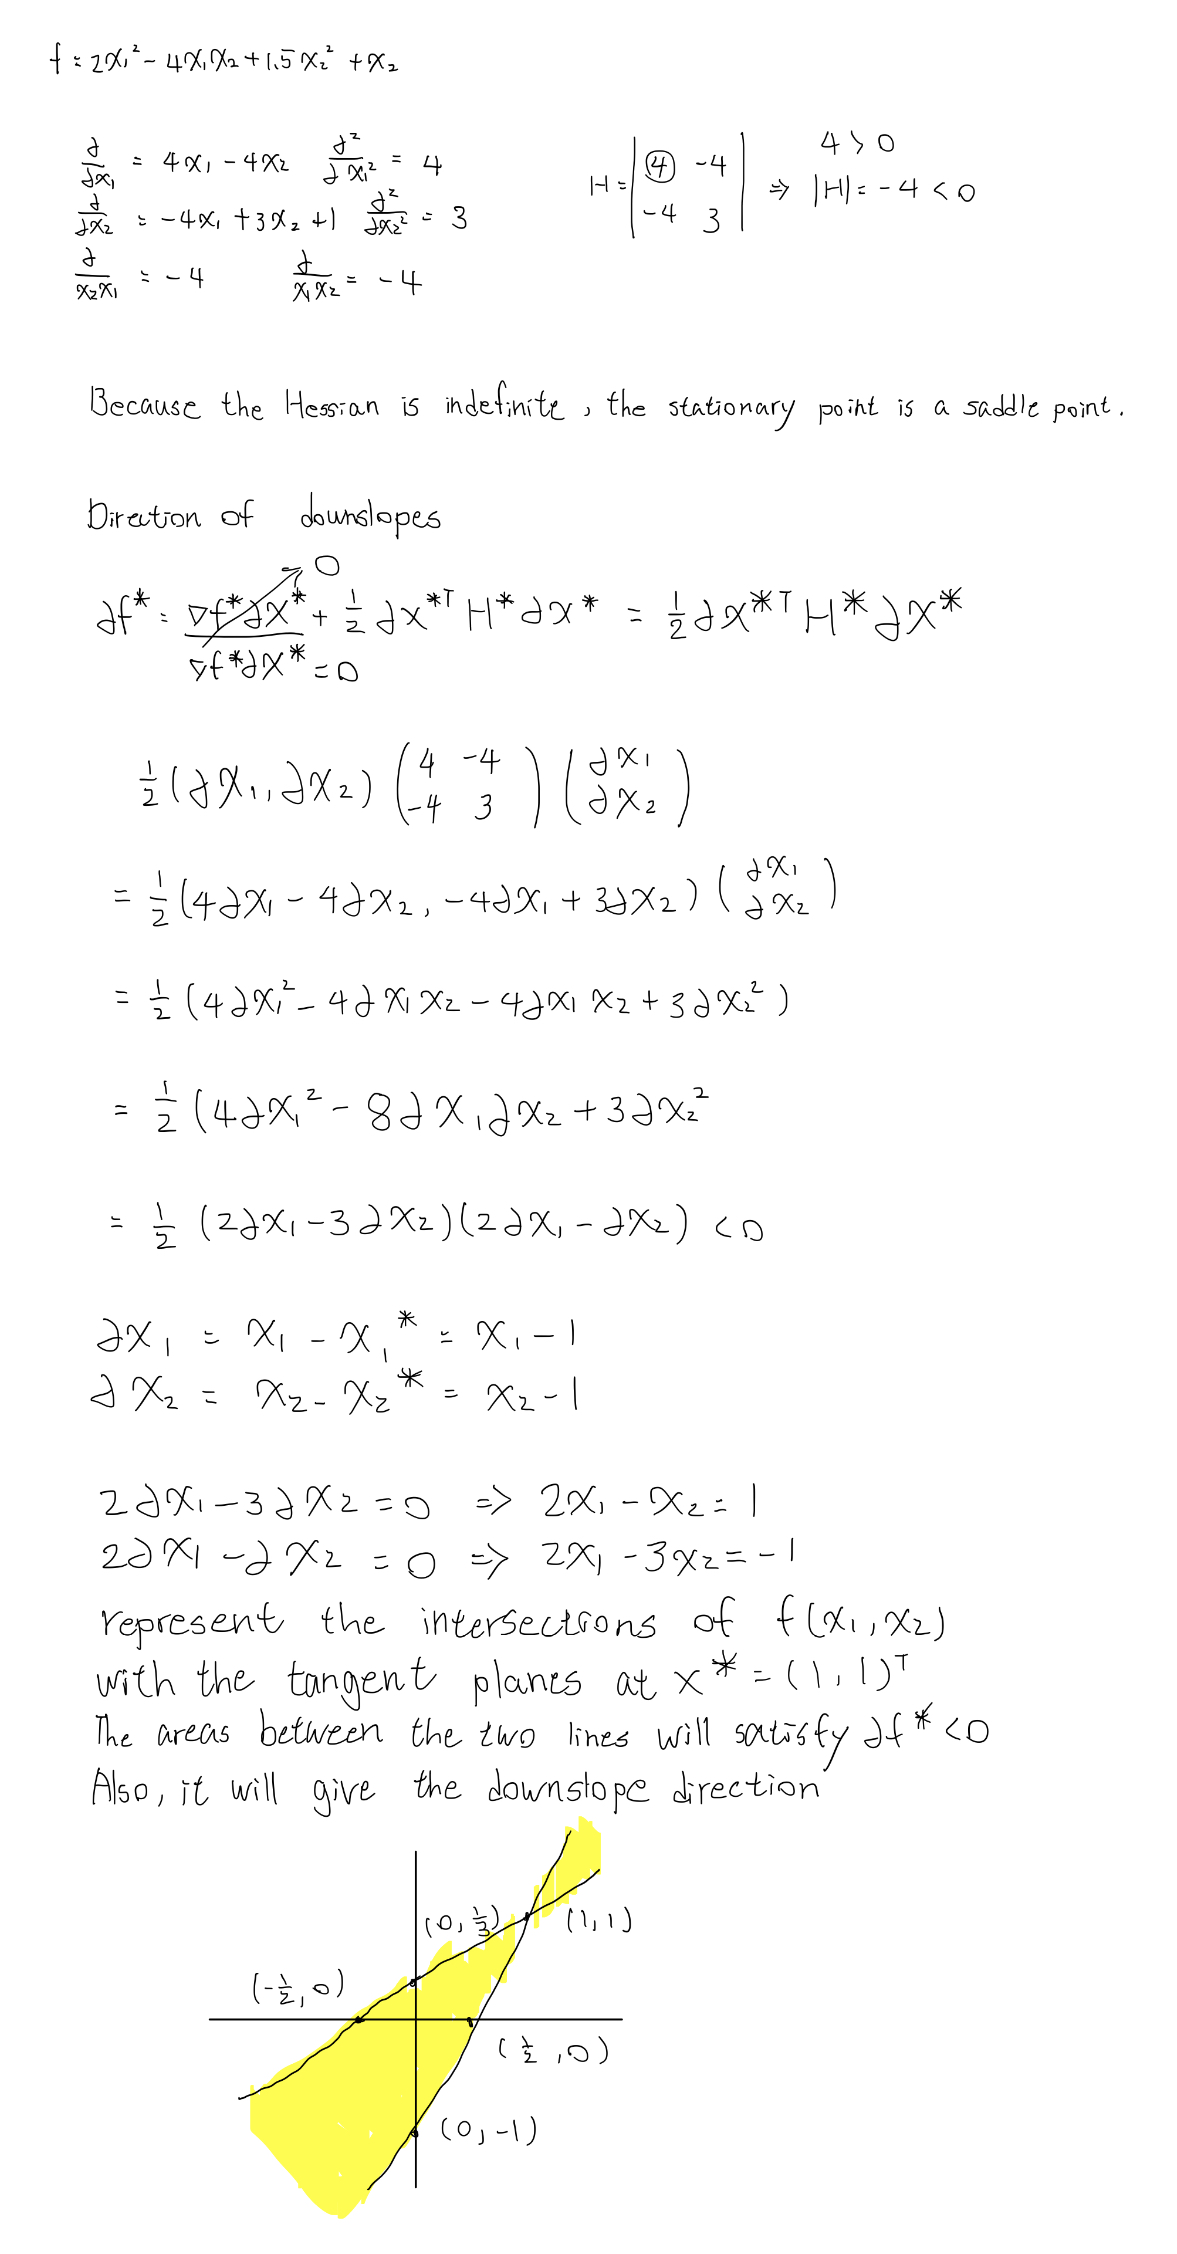

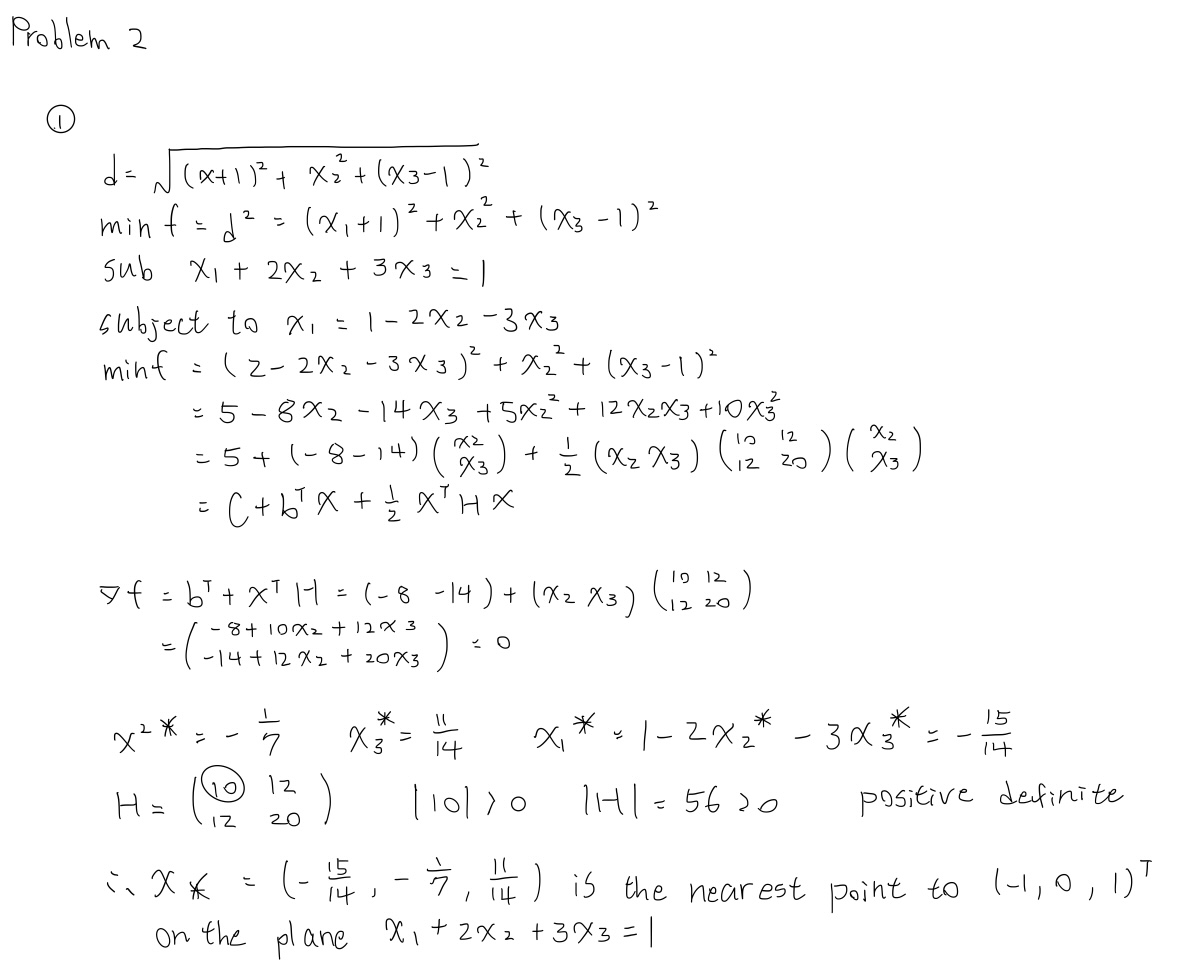

global minum ::0.2673 ,x1=-1.0714 x2=-0.1429 x3=0.7857
 the minum distance for gradient decent with line search::0.2713,x1=-1.0724 x2=-0.1037 x3=0.7599 with iteration 30
 the minum distance for newton algorithm::0.2673,x1=-1.0714 x2=-0.1429 x3=0.7857 with iteration 2


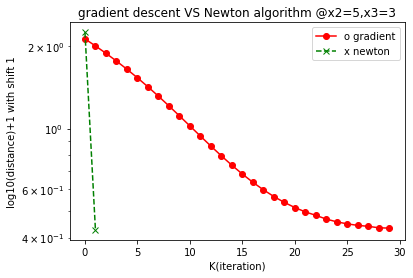

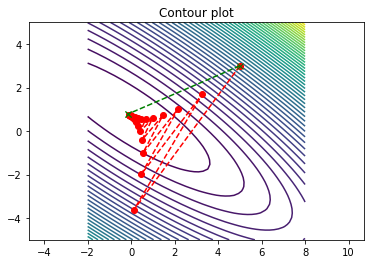

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def loss_func(x):
    loss=5-8*x[0]-14*x[1]+5*x[0]**2+12*x[0]*x[1]+10*x[1]**2
    gradient=[-8+10*x[0]+12*x[1],-14+12*x[0]+20*x[1]]
   
    return [loss, gradient]

def newtons(x):
    h=np.array([[10, 12],[12, 20]])
    w = np.zeros((1,2))
    w=x
    datapointnewton=[np.array(x)]
    val1=[]
    check=1
    evals = 0
    while check > 1e-03:
        evals += 1
        loss, grad = loss_func(w)
        val1.append(np.sqrt(loss))
        delta=np.linalg.inv(h)@grad
        new_w=w-delta
        new_loss, new_grad = loss_func(new_w)
        check=np.linalg.norm(new_loss-loss)
        
        loss = new_loss
        grad = new_grad
        w = new_w
        datapointnewton.append(w)  
    return [w,evals,val1,datapointnewton] 
        
    


def GradientDescentLineSearch(x, gamma = 0.1, max_evals = 250):
    
    w = np.zeros((1,2))
    w=x
    datapointgradient=[np.array(x)]
    evals = 0
    val1=[]
    loss, grad = loss_func(w)
    check=1
    while evals < max_evals and check > 1e-03:
        evals += 1
        alpha=1
        new_w = w - alpha * grad
        new_loss, new_grad = loss_func(new_w)
        while new_loss > loss - gamma * alpha * np.linalg.norm(grad):
            alpha = alpha / 2
            new_w = w - [alpha * grad[0],alpha*grad[1]]
            new_loss, new_grad = loss_func(new_w)
        
        check=np.linalg.norm(new_loss-loss)
        loss = new_loss
        grad = new_grad
        w = new_w
        val1.append(np.sqrt(loss))
        datapointgradient.append(w)
    return [w,evals,val1,datapointgradient] 




x2=-1/7
x3=11/14
x1=1-2*x2-3*x3
tr=5-8*x2-14*x3+5*x2**2+12*x2*x3+10*x3**2
tr=np.sqrt(tr)
print("global minum ::%.4f ,x1=%.4f x2=%.4f x3=%.4f" %(tr,x1,x2,x3))

x = np.array([5, 3])
sol,cc1,d1,datapointgradient=GradientDescentLineSearch(x)
x1=1-2*sol[0]-3*sol[1]
print(" the minum distance for gradient decent with line search::%.4f,x1=%.4f x2=%.4f x3=%.4f"%(d1[-1],x1,sol[0],sol[1]),"with iteration",cc1)

sol,cc2,d2,datapointnewton=newtons(x)
x1=1-2*sol[0]-3*sol[1]
print(" the minum distance for newton algorithm::%.4f,x1=%.4f x2=%.4f x3=%.4f"%(d2[-1],x1,sol[0],sol[1]),"with iteration",cc2)

%matplotlib inline

fig = plt.figure() 

for i in range(0,cc1):
    d1[i]=math.log10(d1[i])+1
    
for i in range(0,cc2):
    d2[i]=math.log10(d2[i])+1
    
plt.plot(d1, 'ro-',label='o gradient')
plt.plot(d2, 'gx--',label='x newton')
plt.semilogy()

plt.legend()
plt.xlabel('K(iteration)')
plt.ylabel('log10(distance)+1 with shift 1')
plt.title('gradient descent VS Newton algorithm @x2=5,x3=3')
plt.show()

fig = plt.figure()
plt.title('Contour plot')
xmesh, ymesh = np.mgrid[-2:8:50j,-5:5:50j]
fmesh = loss_func(np.array([xmesh, ymesh]))[0]
plt.contour(xmesh, ymesh, fmesh, 50)
plt.axis("equal")
newton_array = np.array(datapointnewton)
gradient_array = np.array(datapointgradient)
plt.plot(gradient_array.T[0], gradient_array.T[1],'ro--')
plt.plot(newton_array.T[0], newton_array.T[1],'gx--')


Point (5,3) is the initial point tested. The solution suggest that Newton's method is more efficient as it only requres 2 iteration including the inital iteration. On the other hand gradient decent method requires 30 iterations.

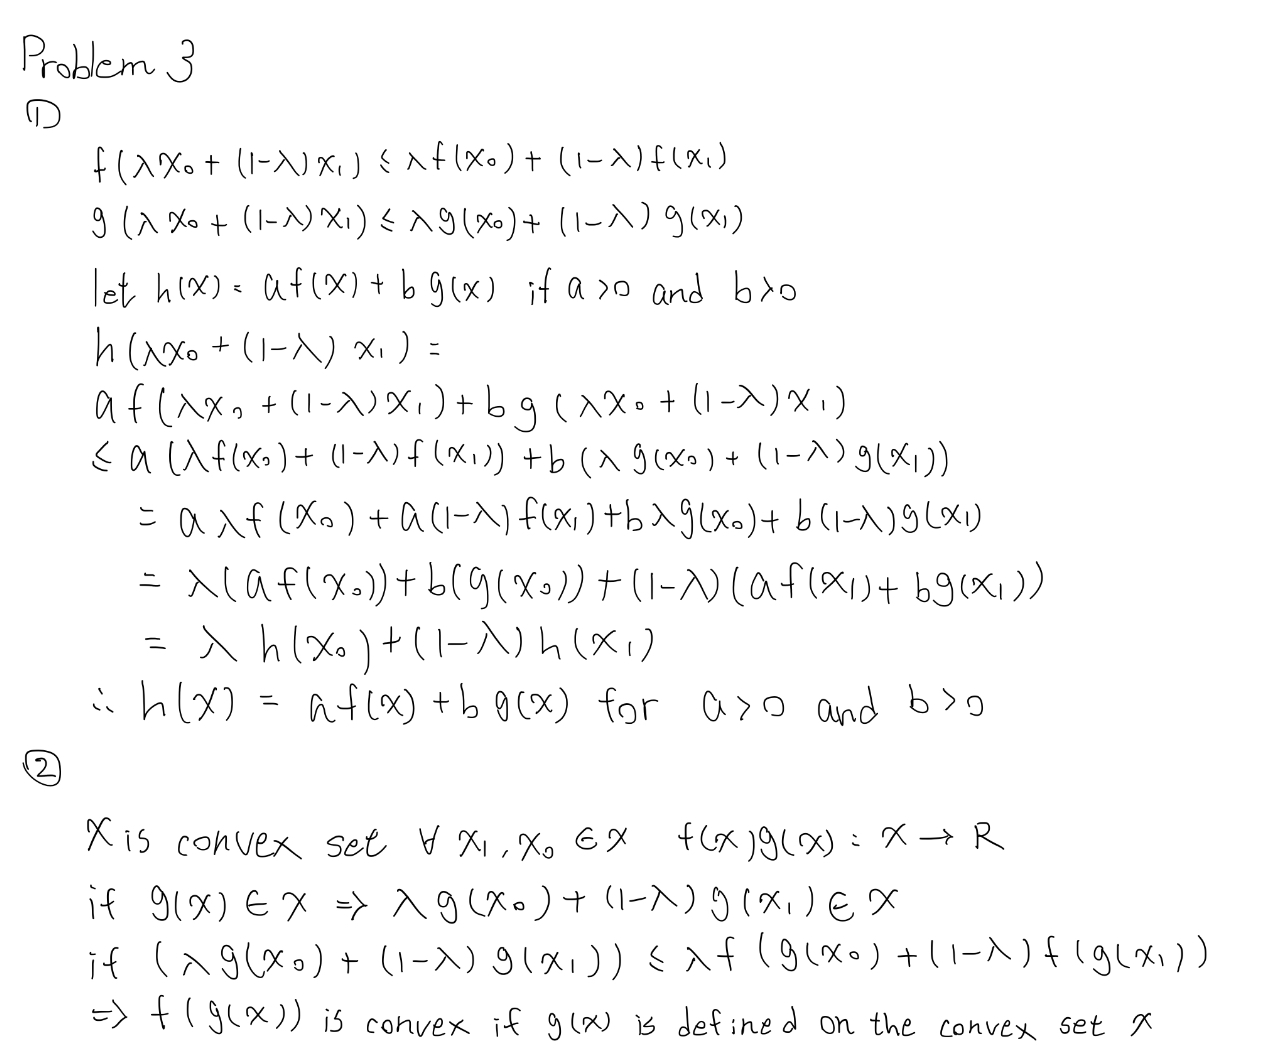

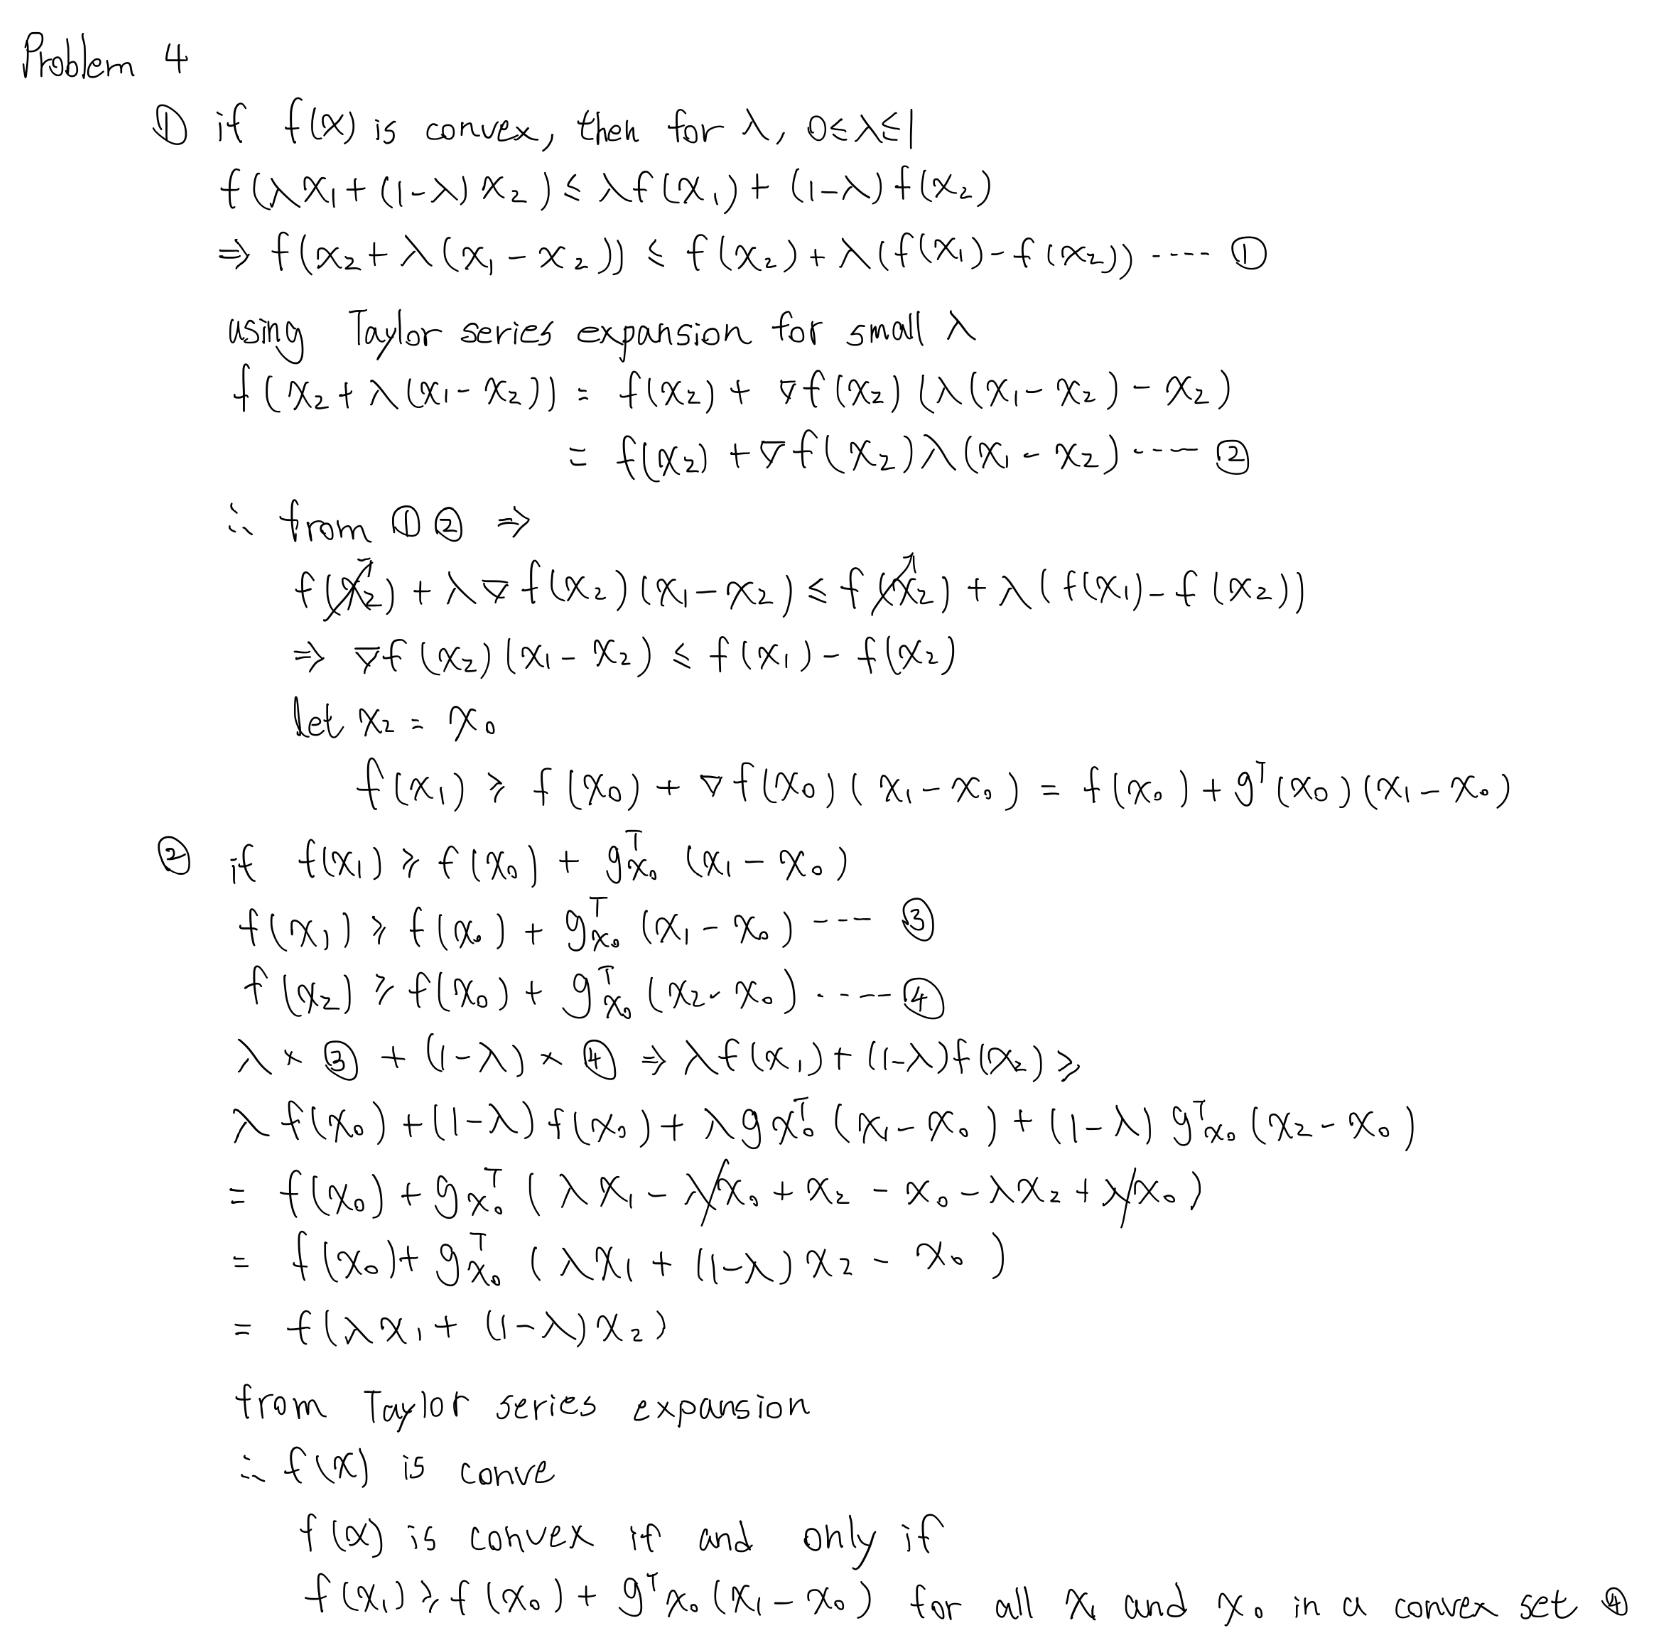

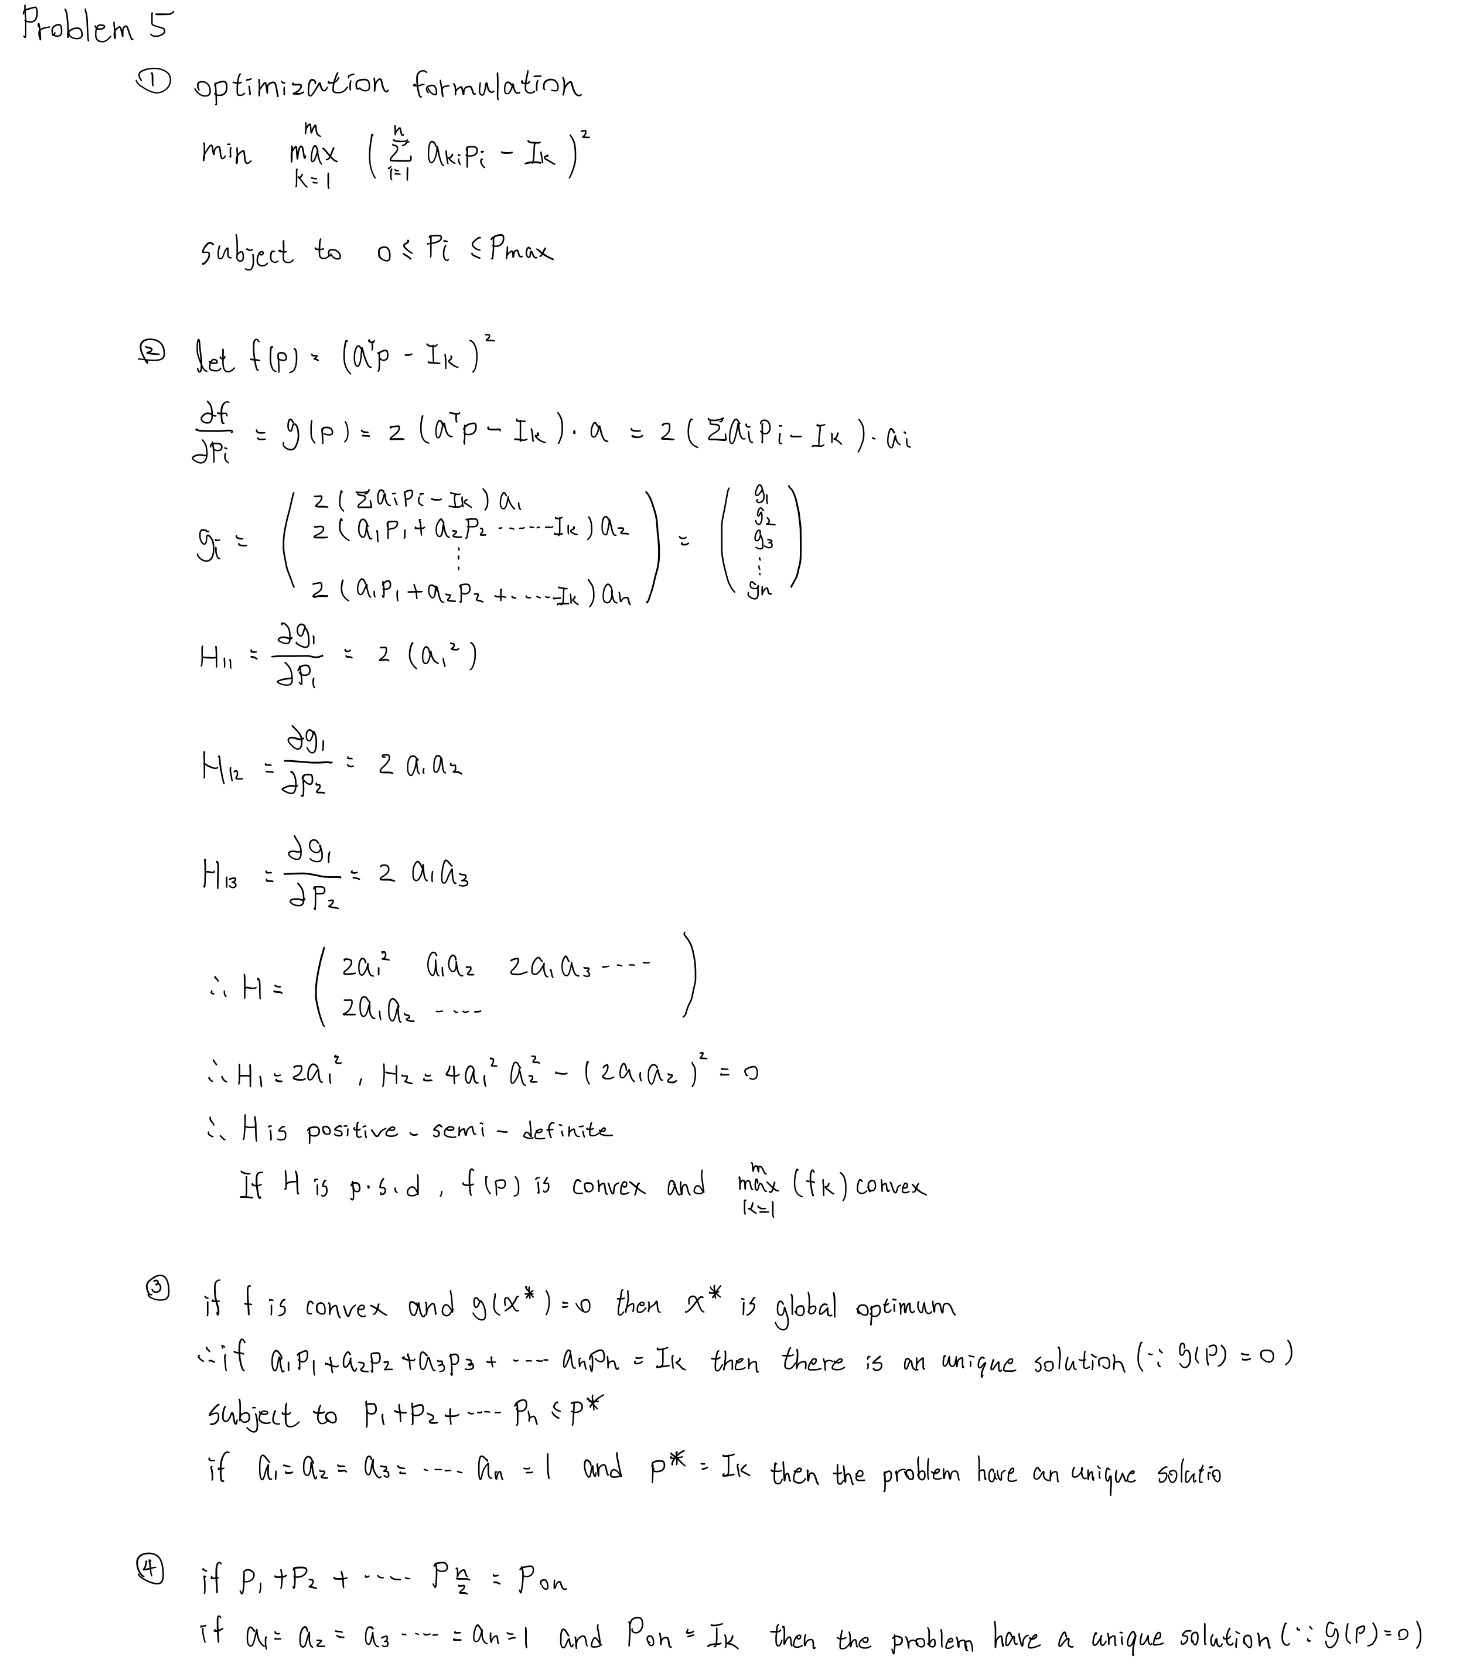